# 1. Data cleaning and EDA

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_parquet("squawk7700_trajectories.parquet.gz", engine="pyarrow")

In [3]:
df.head()

,timestamp,altitude,callsign,flight_id,groundspeed,icao24,latitude,longitude,squawk,track,vertical_rate
0,2018-01-01 12:29:49+00:00,11300.0,ARG1511,ARG1511_20180101,309.885195,e06442,-31.449051,-63.963318,7700,130.441641,3008.000000
1,2018-01-01 12:29:50+00:00,11375.0,ARG1511,ARG1511_20180101,310.264709,e06442,-31.450453,-63.961432,7700,130.441641,3040.000000
2,2018-01-01 12:29:51+00:00,11450.0,ARG1511,ARG1511_20180101,310.644223,e06442,-31.451856,-63.959546,7700,130.441641,3072.000000
3,2018-01-01 12:29:52+00:00,11500.0,ARG1511,ARG1511_20180101,311.192793,e06442,-31.452843,-63.958193,7700,130.440361,3074.742857
4,2018-01-01 12:29:53+00:00,11550.0,ARG1511,ARG1511_20180101,311.741363,e06442,-31.453831,-63.956840,7700,130.439081,3077.485714


In [4]:
print(f"df.shape = {df.shape}")

df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
print(f"Data range: {df['timestamp'].agg(['min','max'])}")

df.shape = (4344359, 11)
Data range: min   2018-01-01 12:29:49+00:00
max   2020-01-29 04:09:52+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


In [5]:
df["callsign"].value_counts()

callsign
ASR172B    22825
UAL275     19812
AAL578     18812
UAE15      18220
UAL1827    18150
           ...  
MRA655       232
QID294       168
KLM85R        70
HDA391        53
EZY43YH       33
Name: count, Length: 823, dtype: int64

In [6]:
print(f"Number of unique aircraft: {df['flight_id'].nunique()}")
print(f"Data length: {len(df)}")
print(f"Data length by 30s windows: {len(df) // 30}")
print(f"Data length by 60s windows: {len(df) // 60}")
print(f"Data length by 120s windows: {len(df) // 120}")

Number of unique aircraft: 832
Data length: 4344359
Data length by 30s windows: 144811
Data length by 60s windows: 72405
Data length by 120s windows: 36202


## Missing values and dtype audit

In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344359 entries, 0 to 4344358
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   timestamp      4344359 non-null  datetime64[ms, UTC]
 1   altitude       4344359 non-null  float64            
 2   callsign       4344359 non-null  object             
 3   flight_id      4344359 non-null  object             
 4   groundspeed    4307312 non-null  float64            
 5   icao24         4344359 non-null  object             
 6   latitude       4344359 non-null  float64            
 7   longitude      4344359 non-null  float64            
 8   squawk         4344359 non-null  object             
 9   track          4307312 non-null  float64            
 10  vertical_rate  4307312 non-null  float64            
dtypes: datetime64[ms, UTC](1), float64(6), object(4)
memory usage: 364.6+ MB


In [8]:
df["squawk"] = df["squawk"].astype(float)

In [9]:
na_pct = df.isna().mean().sort_values(ascending=False) * 100
display(na_pct)

track            0.852761
vertical_rate    0.852761
groundspeed      0.852761
callsign         0.000000
altitude         0.000000
timestamp        0.000000
flight_id        0.000000
latitude         0.000000
icao24           0.000000
squawk           0.000000
longitude        0.000000
dtype: float64

In [10]:
df[df["track"].isna()]

,timestamp,altitude,callsign,flight_id,groundspeed,icao24,latitude,longitude,squawk,track,vertical_rate
840722,2018-07-19 21:10:55+00:00,9200.0,BAW2605,BAW2605_20180719,NaN,406b83,40.891800,14.168579,1247.0,NaN,NaN
840723,2018-07-19 21:10:56+00:00,9225.0,BAW2605,BAW2605_20180719,NaN,406b83,40.891800,14.166412,1247.0,NaN,NaN
840724,2018-07-19 21:10:57+00:00,9250.0,BAW2605,BAW2605_20180719,NaN,406b83,40.891800,14.164246,1247.0,NaN,NaN
840725,2018-07-19 21:10:58+00:00,9250.0,BAW2605,BAW2605_20180719,NaN,406b83,40.891765,14.163437,1247.0,NaN,NaN
840726,2018-07-19 21:10:59+00:00,9300.0,BAW2605,BAW2605_20180719,NaN,406b83,40.891951,14.161002,1247.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4234935,2020-01-14 09:07:10+00:00,34500.0,KLM85R,KLM85R_20200114,NaN,4855d2,52.181236,20.967884,7700.0,NaN,NaN
4234936,2020-01-14 09:07:19+00:00,34500.0,KLM85R,KLM85R_20200114,NaN,4855d2,52.178982,20.968645,7700.0,NaN,NaN
4234937,2020-01-14 09:07:30+00:00,34500.0,KLM85R,KLM85R_20200114,NaN,4855d2,52.179582,20.969415,7700.0,NaN,NaN
4234938,2020-01-14 09:07:31+00:00,34500.0,KLM85R,KLM85R_20200114,NaN,4855d2,52.179496,20.969820,7700.0,NaN,NaN


In [11]:
flights_to_drop = df[df["track"].isna()]["callsign"].value_counts()

In [12]:
for flight, count in flights_to_drop.items():
    df = df[df["callsign"] != flight]

In [13]:
na_pct = df.isna().mean().sort_values(ascending=False) * 100
display(na_pct)

timestamp        0.0
altitude         0.0
callsign         0.0
flight_id        0.0
groundspeed      0.0
icao24           0.0
latitude         0.0
longitude        0.0
squawk           0.0
track            0.0
vertical_rate    0.0
dtype: float64

## Primary key and flight segmentation

In [66]:
print(f"Unique flight ids: {df['flight_id'].nunique()}")
print(f"Unique callsign: {len(df['callsign'].unique())}")

Unique flight ids: 824
Unique callsign: 815


These values mean that a flight (callsign) was utilized for different dates. To distinguish between them will only use the *flight_id*

In [ ]:
dupes = df.duplicated(subset=["flight_id", "timestamp"])
print("Exact duplicate rows:", dupes.sum())

Exact duplicate rows: 0


## Emergency vs nromal traffic split

In [ ]:
df["is_7700"] = df["squawk"] == 7700  # General emergency
df["is_7600"] = df["squawk"] == 7600  # Radio failure
df["is_7500"] = df["squawk"] == 7500  # Hijacking
print(
    f"Number of 7700 squawks: {df['is_7700'].sum()}, percent: {df['is_7700'].sum()/len(df)*100:.2f}%"
)
print(
    f"Number of 7600 squawks: {df['is_7600'].sum()}, percent: {df['is_7600'].sum()/len(df)*100}%"
)
print(
    f"Number of 7500 squawks: {df['is_7500'].sum()}, percent: {df['is_7500'].sum()/len(df)*100}%"
)

Number of 7700 squawks: 1254247, percent: 29.12%
Number of 7600 squawks: 169, percent: 0.003923560680071469%
Number of 7500 squawks: 35, percent: 0.0008125717384763398%


Given the small percentage of radio failure and hijacking, we are going to drop completely the flights that have codes **7600** (radio failure) and **7500** (hijacking) because they are rare and would not add any benefit to our model. 
>It might be interesting to predict the radio failures but it seems that the data is scarce.

In [88]:
to_drop = df[df["is_7500"] | df["is_7600"]]["flight_id"].unique()
for flight in to_drop:
    df = df[df["flight_id"] != flight]

In [ ]:
df["is_7700"] = df["squawk"] == 7700  # General emergency
df["is_7600"] = df["squawk"] == 7600  # Radio failure
df["is_7500"] = df["squawk"] == 7500  # Hijacking
print(
    f"Number of 7700 squawks: {df['is_7700'].sum()}, percent: {df['is_7700'].sum()/len(df)*100:.2f}%"
)
print(
    f"Number of 7600 squawks: {df['is_7600'].sum()}, percent: {df['is_7600'].sum()/len(df)*100}%"
)
print(
    f"Number of 7500 squawks: {df['is_7500'].sum()}, percent: {df['is_7500'].sum()/len(df)*100}%"
)

Number of 7700 squawks: 1241664, percent: 29.23%
Number of 7600 squawks: 0, percent: 0.0%
Number of 7500 squawks: 0, percent: 0.0%


## Numeric feature distribution

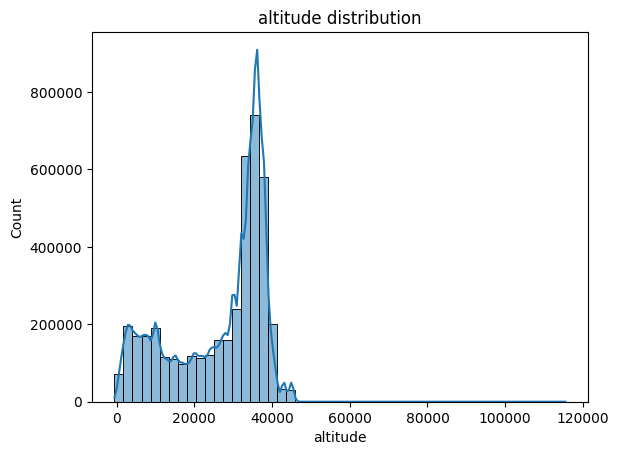

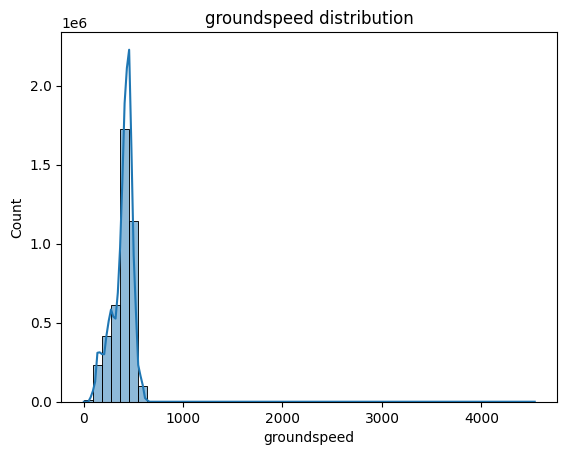

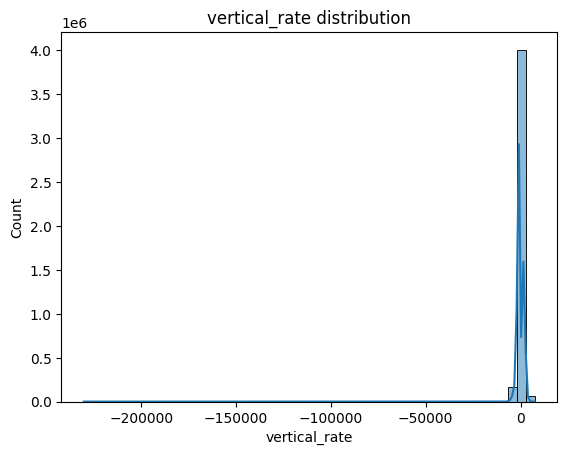

In [ ]:
num_cols = ["altitude", "groundspeed", "vertical_rate"]
df[num_cols].describe().T

for col in num_cols:
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f"{col} distribution")
    plt.show()

It seems that there are some unusual outliers; there are flights that fly at very high altitude, have high velocity and vertical rate.

In [ ]:
print(
    f'Flights with high altitudes :{df[df["altitude"] > 60000]["flight_id"].unique()}'
)


print(f'Flights with high speeds :{df[df["groundspeed"] > 1000]["flight_id"].unique()}')


print(
    f'Flights with high vertical rates :{df[df["vertical_rate"] < -10000]["flight_id"].unique()}'
)

Flights with high altitudes :['WJA175_20180921' 'AAL2536_20181205' 'UAL14_20181211' 'BAW575_20190615'
 'ARG1403_20190713']
Flights with high speeds :['TJK646_20180701']
Flights with high vertical rates :['BAW882_20180115' 'BGA143F_20180226' 'TJK646_20180701' 'GEC8231_20180922'
 'WZZ6TM_20181015' 'AXG1801_20190917' 'NWG872A_20191127']


Some of them belong to the same category. They could be military flights as they fly in unusual conditions. Let's remove they as they are noise.

In [ ]:
to_drop_outliers = df[
    (df["altitude"] > 60000)
    | (df["groundspeed"] > 1000)
    | (df["vertical_rate"] < -10000)
]["flight_id"].unique()


print(f"Flights to drop: {to_drop_outliers}")


for flight in to_drop_outliers:

    df = df[df["flight_id"] != flight]

Flights to drop: ['BAW882_20180115' 'BGA143F_20180226' 'TJK646_20180701' 'WJA175_20180921'
 'GEC8231_20180922' 'WZZ6TM_20181015' 'AAL2536_20181205' 'UAL14_20181211'
 'BAW575_20190615' 'ARG1403_20190713' 'AXG1801_20190917'
 'NWG872A_20191127']


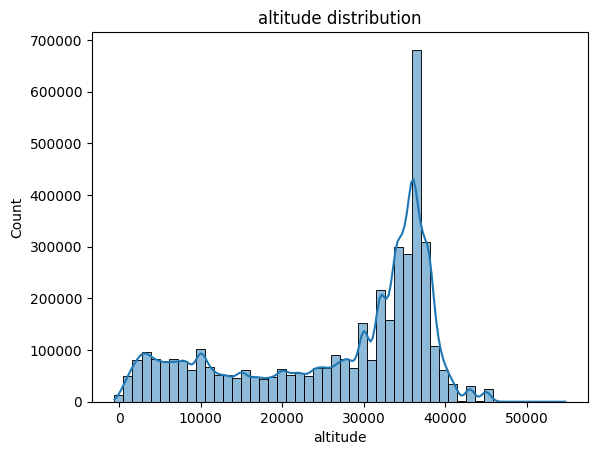

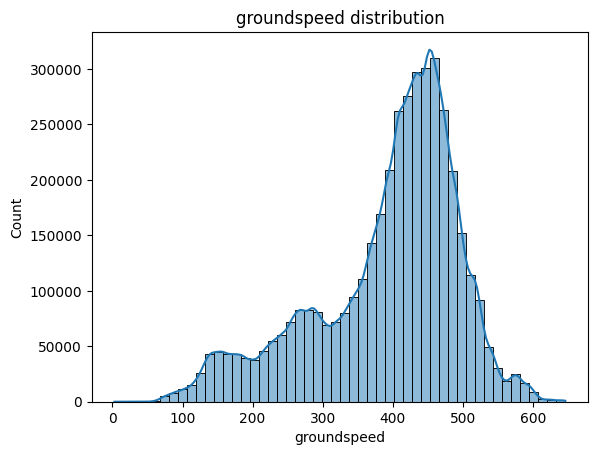

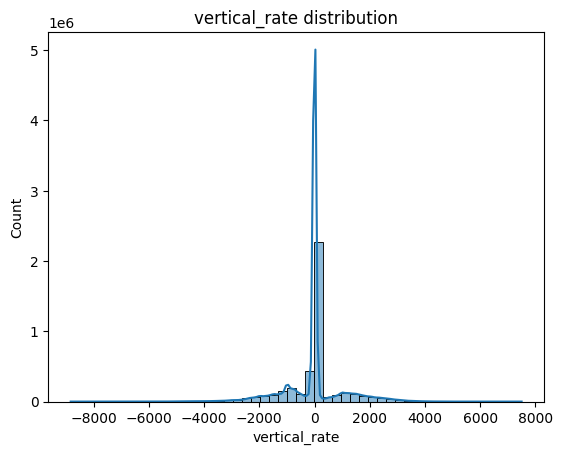

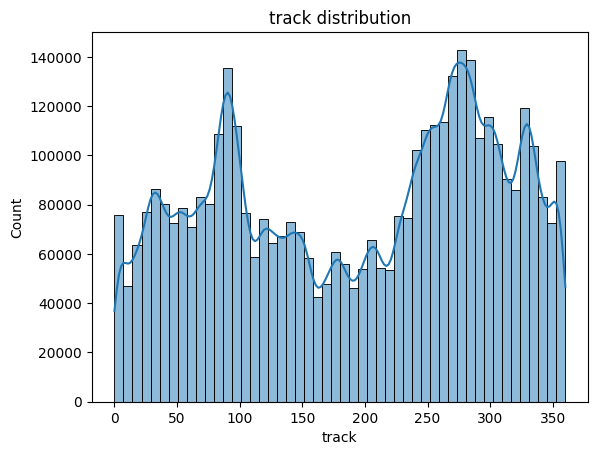

In [ ]:
num_cols = ["altitude", "groundspeed", "vertical_rate", "track"]
df[num_cols].describe().T

for col in num_cols:
    sns.histplot(df[col].dropna(), bins=50, kde=True)
    plt.title(f"{col} distribution")
    plt.show()

In [161]:
print(f"Min track: {df['track'].min()}")
print(f"Max track: {df['track'].max()}")

Min track: 0.0
Max track: 359.99999999999994


It seems that we still have some outliers. From a statistical perspective, we could try to remove them, especially given the differences in vertical rates.

In [137]:
vr_outliers = df[(df["vertical_rate"] < -3000) | (df["vertical_rate"] > 3000)]
print(f'Flights with high vertical rates: {len(vr_outliers["flight_id"].unique())}')

Flights with high vertical rates: 609


But as it can be seen, we have 609 flights that have vertical rates <-3000 or vertical rate >3000. 

In [141]:
vr_outliers[vr_outliers["is_7700"]]["flight_id"]

0          ARG1511_20180101
1          ARG1511_20180101
2          ARG1511_20180101
3          ARG1511_20180101
4          ARG1511_20180101
                 ...       
4338007    SWA2192_20200129
4338008    SWA2192_20200129
4338011    SWA2192_20200129
4338013    SWA2192_20200129
4338015    SWA2192_20200129
Name: flight_id, Length: 36928, dtype: object

In [ ]:
print(
    f'Outliers with emergency: {len(vr_outliers[vr_outliers["is_7700"]]["flight_id"].unique()) }'
)

Outliers with emergency: 274


It seems that out of that 609 flights, 274 had emergency and therefore we should not remove them.

## Spatial Sanity-Check

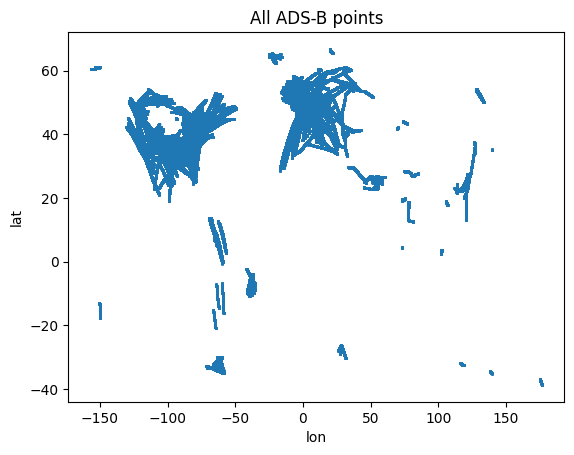

In [ ]:
plt.scatter(df["longitude"], df["latitude"], s=1, alpha=0.2)
plt.title("All ADS-B points")
plt.xlabel("lon")
plt.ylabel("lat")
plt.show()

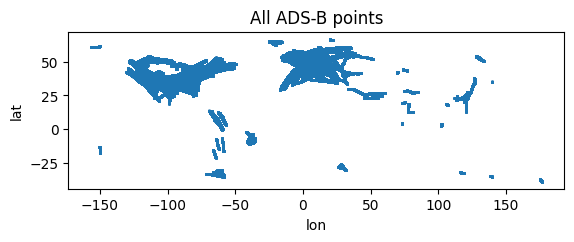

In [ ]:
plt.scatter(df["longitude"], df["latitude"], s=1, alpha=0.2)
plt.title("All ADS-B points")
plt.xlabel("lon")
plt.ylabel("lat")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

Check for coordinates outside: latitude [-90, 90], or longitute [-180, 180]

In [ ]:
bad = df[(df.latitude.abs() > 90) | (df.longitude.abs() > 180)]
print("Bad coords:", len(bad))

Bad coords: 0


## Per-flight time-series preview

We can have a quick look over some flights to verify the chronological order

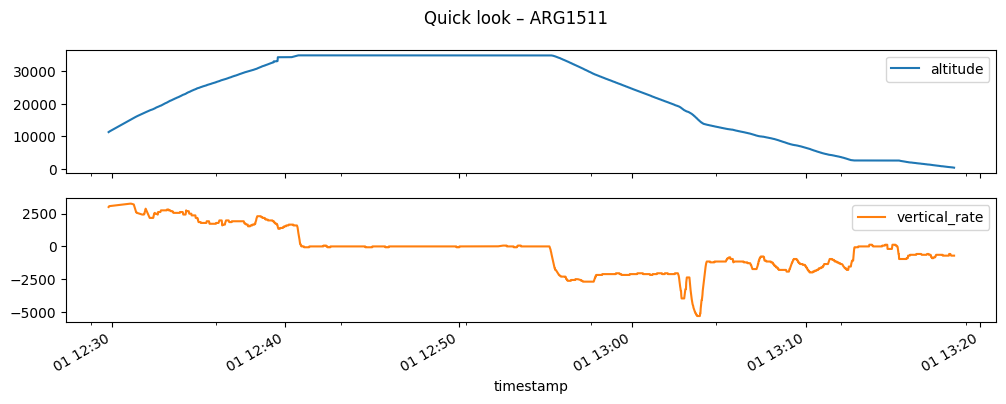

In [ ]:
sample = df[df["flight_id"] == df["flight_id"].iloc[0]]
sample.plot(
    x="timestamp", y=["altitude", "vertical_rate"], subplots=True, figsize=(12, 4)
)
plt.suptitle(f"Quick look - {sample['callsign'].iloc[0]}")
plt.show()

## Final dataset details

In [ ]:
def dataset_details(df: pd.DataFrame) -> None:

    print(f"Number of unique aircraft: {df['flight_id'].nunique()}")
    print(f"Data length: {len(df)}")
    print(f"Data length by 30s windows: {len(df) // 30}")
    print(f"Data length by 60s windows: {len(df) // 60}")
    print(f"Data length by 120s windows: {len(df) // 120}")

    print("\n" + 15 * "-")
    print("Dataset info:")
    print(df.info(show_counts=True))

    print("\n" + 15 * "-")
    print("Dataset na percentages:")
    na_pct = df.isna().mean().sort_values(ascending=False) * 100
    display(na_pct)

    print("\n" + 15 * "-")
    print(f"Unique flight ids: {df['flight_id'].nunique()}")
    print(f"Unique callsign: {len(df['callsign'].unique())}")

    print("\n" + 15 * "-")
    dupes = df.duplicated(subset=["flight_id", "timestamp"])
    print("Exact duplicate rows:", dupes.sum())

    print("\n" + 15 * "-")
    print(
        f"Number of 7700 squawks: {df['is_7700'].sum()}, percent: {df['is_7700'].sum()/len(df)*100:.2f}%"
    )
    print(
        f"Number of 7600 squawks: {df['is_7600'].sum()}, percent: {df['is_7600'].sum()/len(df)*100}%"
    )
    print(
        f"Number of 7500 squawks: {df['is_7500'].sum()}, percent: {df['is_7500'].sum()/len(df)*100}%"
    )


dataset_details(df)

Number of unique aircraft: 768
Data length: 4175022
Data length by 30s windows: 139167
Data length by 60s windows: 69583
Data length by 120s windows: 34791

---------------
Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 4175022 entries, 0 to 4344358
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype              
---  ------         --------------    -----              
 0   timestamp      4175022 non-null  datetime64[ms, UTC]
 1   altitude       4175022 non-null  float64            
 2   callsign       4175022 non-null  object             
 3   flight_id      4175022 non-null  object             
 4   groundspeed    4175022 non-null  float64            
 5   icao24         4175022 non-null  object             
 6   latitude       4175022 non-null  float64            
 7   longitude      4175022 non-null  float64            
 8   squawk         4175022 non-null  float64            
 9   track          4175022 non-null  float64            
 10  vert

timestamp        0.0
altitude         0.0
callsign         0.0
flight_id        0.0
groundspeed      0.0
icao24           0.0
latitude         0.0
longitude        0.0
squawk           0.0
track            0.0
vertical_rate    0.0
is_7700          0.0
is_7600          0.0
is_7500          0.0
dtype: float64


---------------
Unique flight ids: 803
Unique callsign: 797

---------------
Exact duplicate rows: 0

---------------
Number of 7700 squawks: 1214765, percent: 29.10%
Number of 7600 squawks: 0, percent: 0.0%
Number of 7500 squawks: 0, percent: 0.0%


In [158]:
df.head()

,timestamp,altitude,callsign,flight_id,groundspeed,icao24,latitude,longitude,squawk,track,vertical_rate,is_7700,is_7600,is_7500
0,2018-01-01 12:29:49+00:00,11300.0,ARG1511,ARG1511_20180101,309.885195,e06442,-31.449051,-63.963318,7700.0,130.441641,3008.000000,True,False,False
1,2018-01-01 12:29:50+00:00,11375.0,ARG1511,ARG1511_20180101,310.264709,e06442,-31.450453,-63.961432,7700.0,130.441641,3040.000000,True,False,False
2,2018-01-01 12:29:51+00:00,11450.0,ARG1511,ARG1511_20180101,310.644223,e06442,-31.451856,-63.959546,7700.0,130.441641,3072.000000,True,False,False
3,2018-01-01 12:29:52+00:00,11500.0,ARG1511,ARG1511_20180101,311.192793,e06442,-31.452843,-63.958193,7700.0,130.440361,3074.742857,True,False,False
4,2018-01-01 12:29:53+00:00,11550.0,ARG1511,ARG1511_20180101,311.741363,e06442,-31.453831,-63.956840,7700.0,130.439081,3077.485714,True,False,False


We do not need all the columns and therefore we will keep only:
**timestamp, altitude, flight_id, groundspeed, latitude, longitude, track, vertical_rate, is_7700**

In [ ]:
df_new = df.copy(deep=True)
df_new.drop(
    ["callsign", "icao24", "squawk", "is_7600", "is_7500"], axis=1, inplace=True
)

In [163]:
df_new.head()

,timestamp,altitude,flight_id,groundspeed,latitude,longitude,track,vertical_rate,is_7700
0,2018-01-01 12:29:49+00:00,11300.0,ARG1511_20180101,309.885195,-31.449051,-63.963318,130.441641,3008.000000,True
1,2018-01-01 12:29:50+00:00,11375.0,ARG1511_20180101,310.264709,-31.450453,-63.961432,130.441641,3040.000000,True
2,2018-01-01 12:29:51+00:00,11450.0,ARG1511_20180101,310.644223,-31.451856,-63.959546,130.441641,3072.000000,True
3,2018-01-01 12:29:52+00:00,11500.0,ARG1511_20180101,311.192793,-31.452843,-63.958193,130.440361,3074.742857,True
4,2018-01-01 12:29:53+00:00,11550.0,ARG1511_20180101,311.741363,-31.453831,-63.956840,130.439081,3077.485714,True


In [ ]:
df_new.to_csv("cleaned_trajectories.csv", index=False)